# NIST Pin Location Errors

Data provided by John Slotwinski on 2/29/2016 ("EOS 290 Calibration for Maraging Steel" worksheet "Pin and Hole Locations").


In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
%matplotlib inline 

__author__ = "mjp"
__version__ = "0.0.1"
__status__ = "development"

__copyright__ = "Copyright 2016, JHU/APL"
__license__ = "Apache, Version 2.0"

import os, csv

import numpy as np
import pylab as plt
from mpl_toolkits.mplot3d import axes3d, art3d

from helpers import plot_xy_err_2d, cart2polar

In [89]:
def load_data(fn):
    "Load data sets from three different experiments."
    X = []
    D1 = []
    D2 = []
    D3 = []
    
    with open(fn, 'rU') as f:
        reader = csv.reader(f, delimiter=',')
        for rowIdx, row in enumerate(reader):
            # skip anything that isn't a pin measurement
            if not row[0].startswith('Pin'):
                continue
                
            # there's a blank column in this worksheet
            row = [x for x in row if len(x)]
                
            data = [float(v) for v in row[1:]]
            x, y = data[0:2]
            dx1, dy1 = data[2:4]
            dx2, dy2 = data[4:6]
            dx3, dy3 = data[6:]
            
            X.append((x,y))
            D1.append((dx1, dy1))
            D2.append((dx2, dy2))
            D3.append((dx3, dy3))
            
    return np.array(X), np.array(D1), np.array(D2), np.array(D3)


def rot_matrix_2d(phi):
    "clockwise rotation in 2d"
    return np.array([[np.cos(phi), np.sin(phi)], [-np.sin(phi), np.cos(phi)]])


def plot_pins(Xn, Xm, units='(mm)'):
    plt.figure()
    plt.plot([-52, 52], [0, 0], 'k-')
    plt.plot([0, 0], [-52, 52], 'k-')
    plt.scatter(Xn[:,0], Xn[:,1], color='magenta')
    plt.scatter(Xm[:,0], Xm[:,1], color='blue')

    plt.legend(['nominal', 'measured'])
    plt.xlabel('x location ' + units)
    plt.ylabel('y location ' + units)


In [90]:
Xn, D1, D2, D3 = load_data('/Users/pekalmj1/Documents/bb/gpam/data/NIST_EOS_290_Maraging_Steel/pin_and_hole_locations.csv')
assert(X.shape[0] == 16)  # there should be 16 pins
#print np.concatenate((X,Y3), axis=1)

rN, thetaN = cart2polar(Xn[:,0], Xn[:,1])  # nominal locations in polar coordinates

# From the spreadsheet, it seems that:
#    delta_x := x_nominal - X_measured
#
Xm1 = Xn - D1
Xm2 = Xn - D2
Xm3 = Xn - D3

## MS-1 Trial 1

<IPython.core.display.Javascript object>


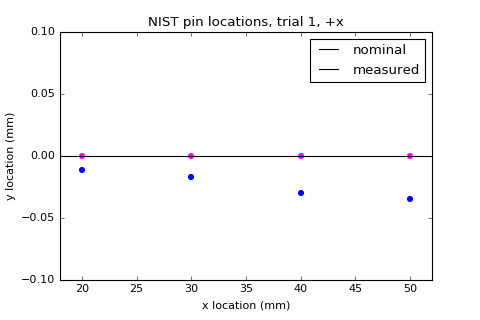

<IPython.core.display.Javascript object>


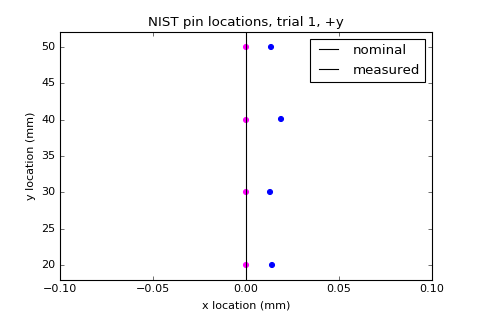

<IPython.core.display.Javascript object>


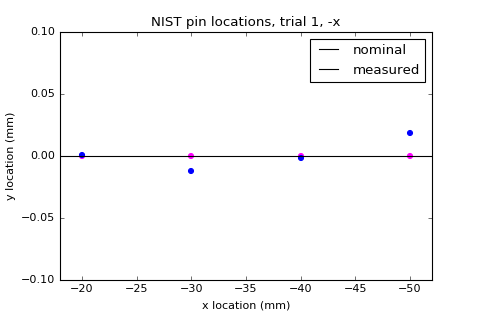

<IPython.core.display.Javascript object>


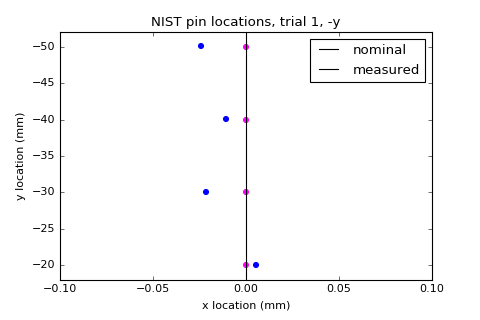

<IPython.core.display.Javascript object>


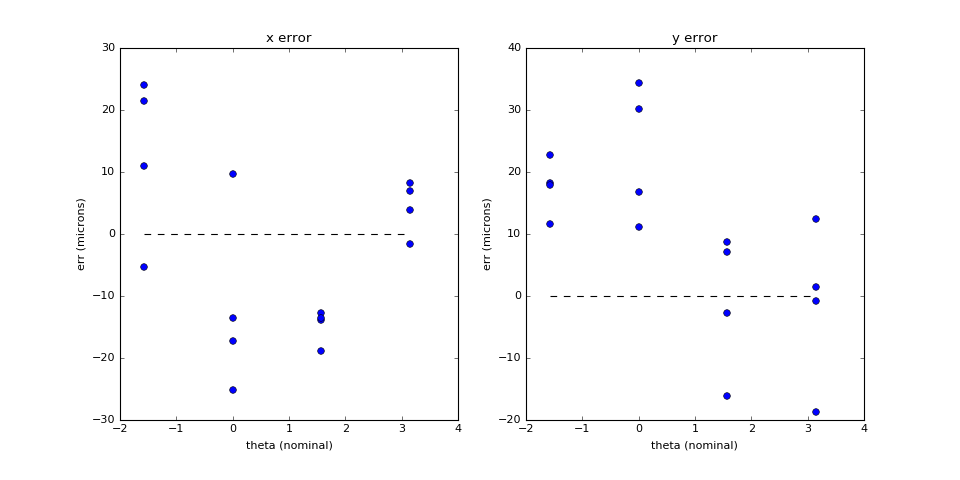

In [91]:
plot_pins(Xn, Xm1)
plt.title('NIST pin locations, trial 1, +x')
plt.xlim([18, 52]);  plt.ylim([-.1, .1])

plot_pins(Xn, Xm1)
plt.title('NIST pin locations, trial 1, +y')
plt.xlim([-.1, .1]);  plt.ylim([18, 52])

plot_pins(Xn, Xm1)
plt.title('NIST pin locations, trial 1, -x')
plt.xlim([-18, -52]);  plt.ylim([-.1, .1])

plot_pins(Xn, Xm1)
plt.title('NIST pin locations, trial 1, -y')
plt.xlim([-.1, .1]);  plt.ylim([-18, -52])

plot_xy_err_2d(theta, 1000*D1[:,0], 1000*D1[:,1], xLabel='theta (nominal)', yLabel='err (microns)')

## MS-1 Trial 2

<IPython.core.display.Javascript object>


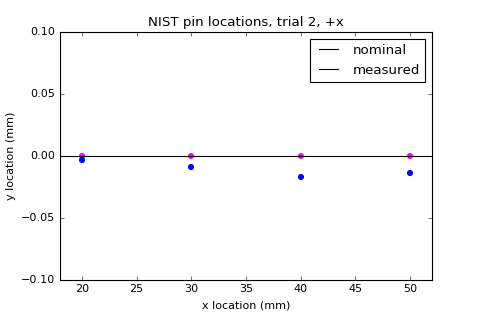

<IPython.core.display.Javascript object>


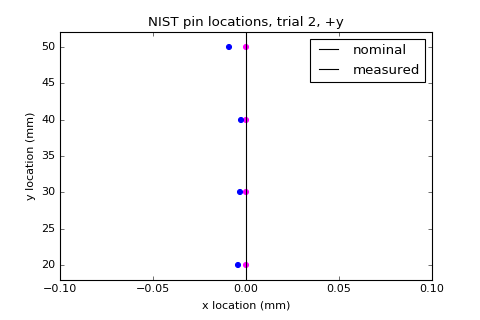

<IPython.core.display.Javascript object>


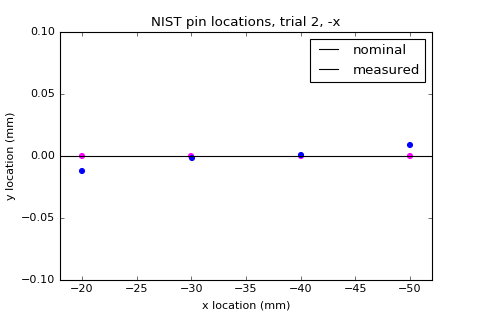

<IPython.core.display.Javascript object>


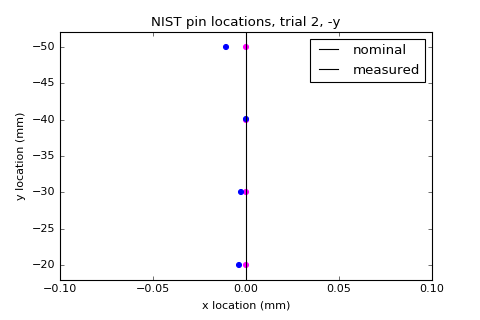

<IPython.core.display.Javascript object>


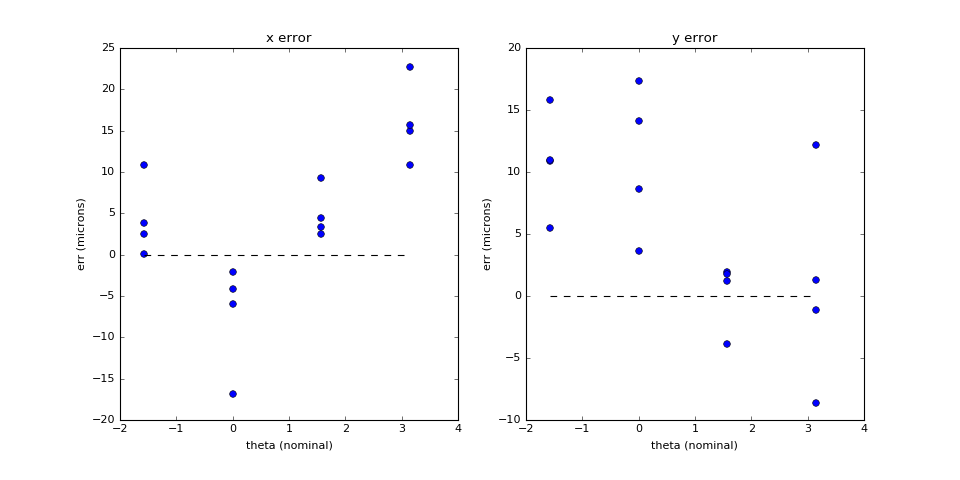

In [92]:
plot_pins(Xn, Xm2)
plt.title('NIST pin locations, trial 2, +x')
plt.xlim([18, 52]);  plt.ylim([-.1, .1])

plot_pins(Xn, Xm2)
plt.title('NIST pin locations, trial 2, +y')
plt.xlim([-.1, .1]);  plt.ylim([18, 52])

plot_pins(Xn, Xm2)
plt.title('NIST pin locations, trial 2, -x')
plt.xlim([-18, -52]);  plt.ylim([-.1, .1])

plot_pins(Xn, Xm2)
plt.title('NIST pin locations, trial 2, -y')
plt.xlim([-.1, .1]);  plt.ylim([-18, -52])

plot_xy_err_2d(theta, 1000*D2[:,0], 1000*D2[:,1], xLabel='theta (nominal)', yLabel='err (microns)')

## MS-1 Trial 3

<IPython.core.display.Javascript object>


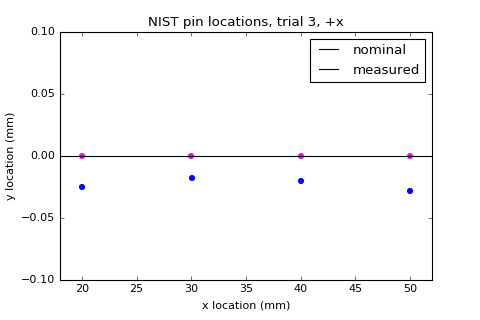

<IPython.core.display.Javascript object>


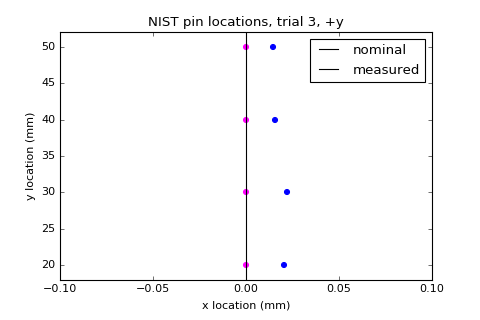

<IPython.core.display.Javascript object>


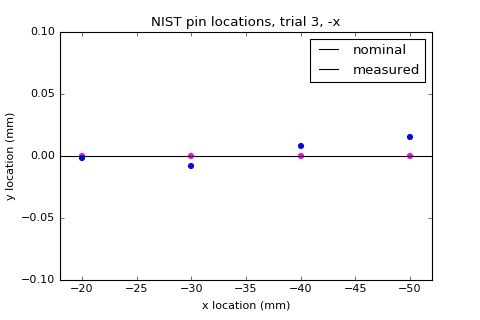

<IPython.core.display.Javascript object>


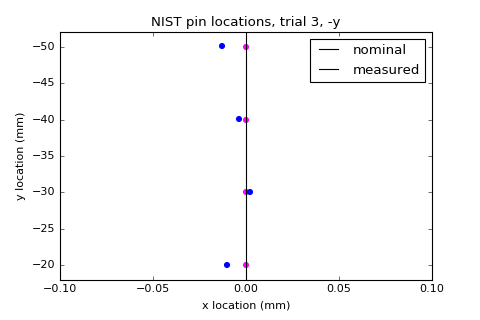

<IPython.core.display.Javascript object>


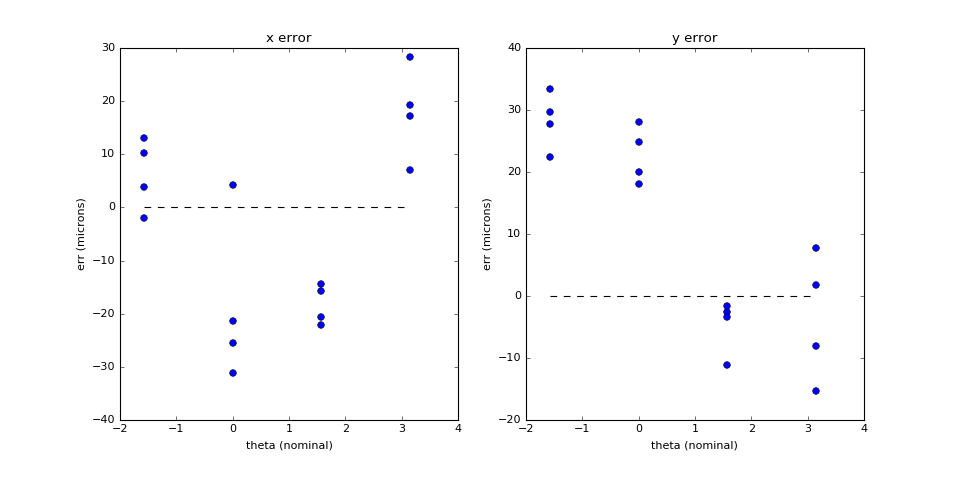

In [93]:
plot_pins(Xn, Xm3)
plt.title('NIST pin locations, trial 3, +x')
plt.xlim([18, 52]);  plt.ylim([-.1, .1])

plot_pins(Xn, Xm3)
plt.title('NIST pin locations, trial 3, +y')
plt.xlim([-.1, .1]);  plt.ylim([18, 52])

plot_pins(Xn, Xm3)
plt.title('NIST pin locations, trial 3, -x')
plt.xlim([-18, -52]);  plt.ylim([-.1, .1])

plot_pins(Xn, Xm3)
plt.title('NIST pin locations, trial 3, -y')
plt.xlim([-.1, .1]);  plt.ylim([-18, -52])

plot_xy_err_2d(theta, 1000*D3[:,0], 1000*D3[:,1], xLabel='theta (nominal)', yLabel='err (microns)')